In [10]:
# A necessary evil
%load_ext autoreload
%autoreload 2


In [11]:
import astropy.units as u
from astropy.time import Time
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from datetime import datetime, timezone, timedelta
from pathlib import Path


from Utilities import TimeRange
from Io import fgs_is_tracking_direct, fgs_use_angular_rate_direct, fgs_active_pecs_direct, load_stars_table_direct
from Fgs import FgsStarTrackingInterval, FgsStarTrackingIntervalStatistics, fgs_star_tracking_intervals_to_json_file, fgs_star_tracking_intervals_from_json_file, fgs_star_tracking_interval_statistics_to_json_file, fgs_star_tracking_interval_statistics_from_json_file

### JSON de- and serialization of interval statistics

In [12]:
# JSON de- and serialization
interval_statistics = []

for path in Path('out').rglob('EUC_FGS*.json'):
    interval_statistics.extend(fgs_star_tracking_interval_statistics_from_json_file(str(path)))

### Basic plots

In [13]:
x_median_std_pec1 = [stats.x_median_std_pec1 for stats in interval_statistics]
x_median_std_pec2 = [stats.x_median_std_pec2 for stats in interval_statistics]
y_median_std_pec1 = [stats.y_median_std_pec1 for stats in interval_statistics]
y_median_std_pec2 = [stats.y_median_std_pec2 for stats in interval_statistics]
x_median_drift_pec1 = [abs(stats.x_median_drift_pec1) for stats in interval_statistics]
x_median_drift_pec2 = [abs(stats.x_median_drift_pec2) for stats in interval_statistics]
y_median_drift_pec1 = [abs(stats.y_median_drift_pec1) for stats in interval_statistics]
y_median_drift_pec2 = [abs(stats.y_median_drift_pec2) for stats in interval_statistics]
duration_s = [(stats.time_end - stats.time_start).to(u.s).value for stats in interval_statistics]
n_stars = [len(stats.x_medians_pec1) + len(stats.x_medians_pec2) for stats in interval_statistics]

### std PEC1 x PEC2

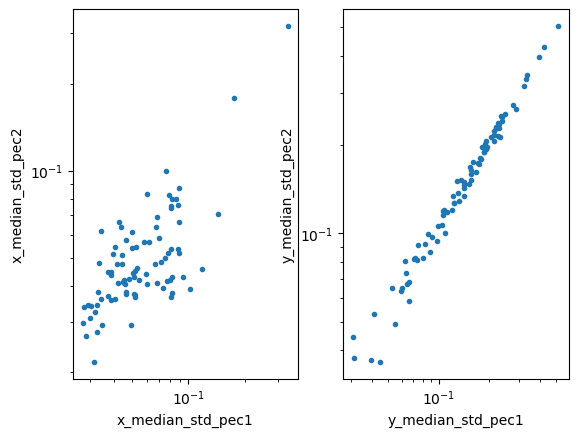

In [14]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(x_median_std_pec1, x_median_std_pec2, '.')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('x_median_std_pec1')
axs[0].set_ylabel('x_median_std_pec2')
axs[1].plot(y_median_std_pec1, y_median_std_pec2, '.')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('y_median_std_pec1')
axs[1].set_ylabel('y_median_std_pec2')
plt.show()

### drift PEC1 x PEC2

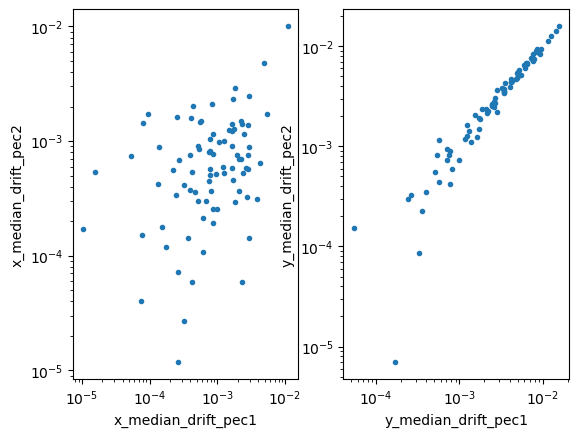

In [15]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(x_median_drift_pec1, x_median_drift_pec2, '.')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('x_median_drift_pec1')
axs[0].set_ylabel('x_median_drift_pec2')
axs[1].plot(y_median_drift_pec1, y_median_drift_pec2, '.')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('y_median_drift_pec1')
axs[1].set_ylabel('y_median_drift_pec2')
plt.show()

### std x drift

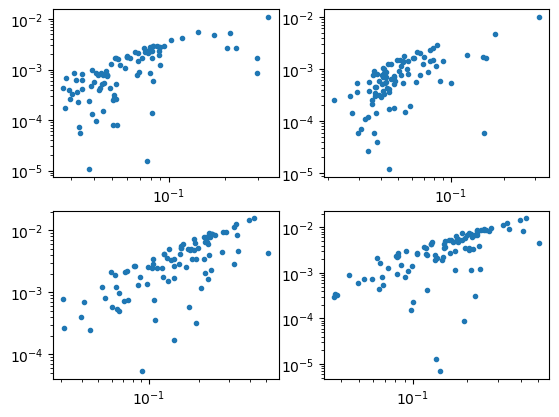

In [16]:
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(x_median_std_pec1, x_median_drift_pec1, '.')
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,1].plot(x_median_std_pec2, x_median_drift_pec2, '.')
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[1,0].plot(y_median_std_pec1, y_median_drift_pec1, '.')
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,1].plot(y_median_std_pec2, y_median_drift_pec2, '.')
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
plt.show()

### duration x drift

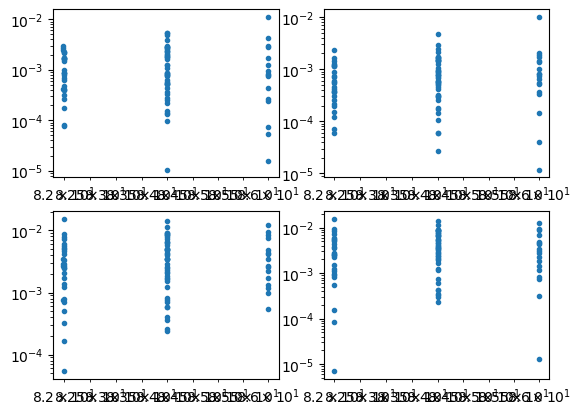

In [17]:
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(duration_s, x_median_drift_pec1, '.')
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,1].plot(duration_s, x_median_drift_pec2, '.')
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[1,0].plot(duration_s, y_median_drift_pec1, '.')
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,1].plot(duration_s, y_median_drift_pec2, '.')
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
plt.show()

### duration x std

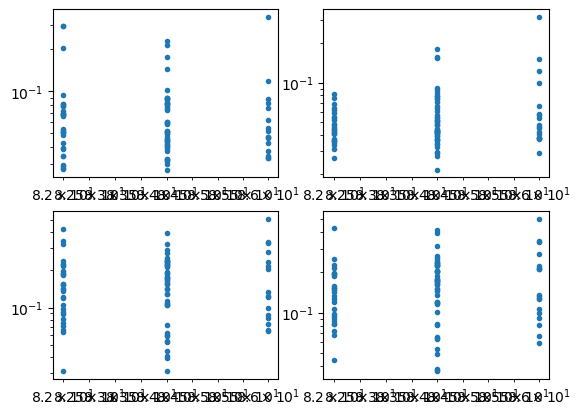

In [18]:
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(duration_s, x_median_std_pec1, '.')
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,1].plot(duration_s, x_median_std_pec2, '.')
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[1,0].plot(duration_s, y_median_std_pec1, '.')
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,1].plot(duration_s, y_median_std_pec2, '.')
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
plt.show()

### n_stars x std

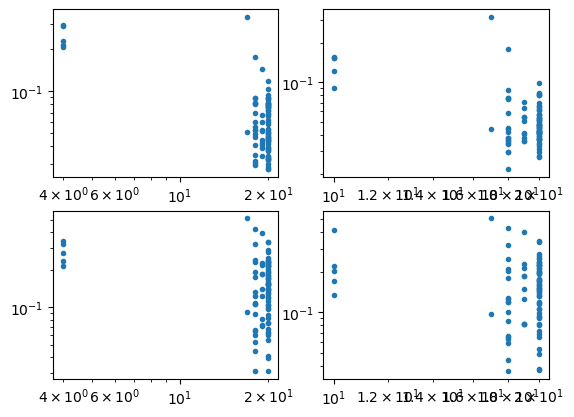

In [19]:
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(n_stars, x_median_std_pec1, '.')
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,1].plot(n_stars, x_median_std_pec2, '.')
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[1,0].plot(n_stars, y_median_std_pec1, '.')
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,1].plot(n_stars, y_median_std_pec2, '.')
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
plt.show()

### n_stars x drift

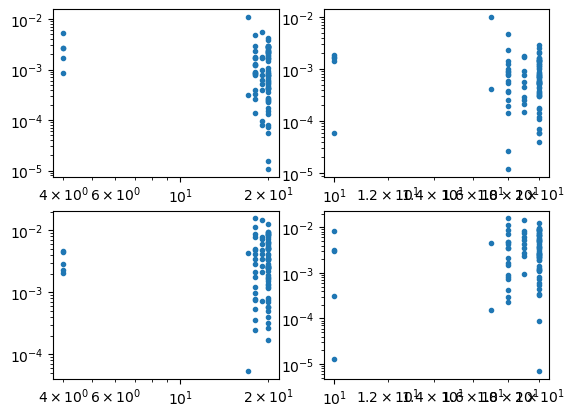

In [20]:
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(n_stars, x_median_drift_pec1, '.')
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,1].plot(n_stars, x_median_drift_pec2, '.')
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[1,0].plot(n_stars, y_median_drift_pec1, '.')
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,1].plot(n_stars, y_median_drift_pec2, '.')
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
plt.show()

### durations

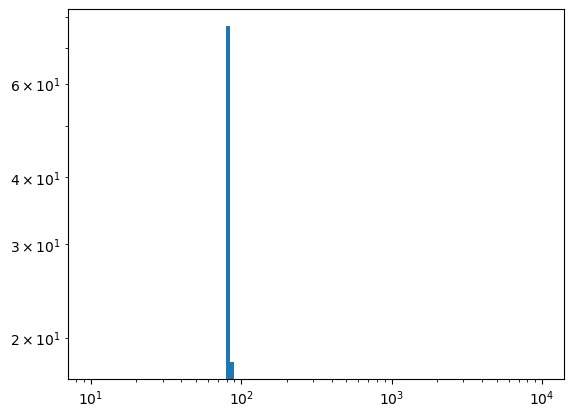

In [21]:
plt.hist(duration_s, bins=np.geomspace(10,10000, 121))
plt.xscale('log')
plt.yscale('log')
plt.show()